**“PROGRAMA ESPECIALIZADO CIENCIA DE DATOS CON PYTHON”**


*PROYECTO Nº 01*


---




# **Ejercicio N°1:**

Escribir un programa que pregunte al usuario o genere las ventas de los últimos 5 días, y muestre por  pantalla una serie (Dataframe) con los datos de las ventas por producto (opcional): Nro de unidades y precio unitario, indexada por los días, antes y después
de aplicarles un descuento del 5%.


---



In [30]:

# Importamos las librerías que necesitaremos para el ejercicio

import pandas as pd
import numpy as np
from datetime import datetime
import os

In [31]:
# Procedemos a generar una lista que contendrá la etiqueta del index de los últimos 5 días

fechas = pd.date_range("20230904", periods=5)

# Generamos una lista con el nombre de los productos
productos = ['Manzanas', 'Naranjas']

# Establecemos el precio en kilos para los distintos productos

precio_manzanas_usd = 2.65
precio_naranjas_usd = 3.25




In [32]:
# Para el ejercicio suponemos que vendemos dos productos
# y procedemos a crear aleatoriamente las ventas por producto


# Semilla aleatoria
np.random.seed(123456)

# Generamos las unidades vendidas en los últimos 5 días
ventas_und_manzanas = list(np.random.randint(100,500, 5))
ventas_und_naranjas = list(np.random.randint(100,500, 5))
ventas_und = [ventas_und_manzanas, ventas_und_naranjas]

# Trasponemos la lista ventas_und para que nos quede en columnas
ventas_und = np.array(ventas_und).T


In [34]:
# Creamos un dataframe con las ventas generadas

# ventas = np.array(ventas, index: fechas, colums:productos, (5,2))

ventas = pd.DataFrame (ventas_und,
                       index=fechas,
                       columns=productos)

ventas

,Manzanas,Naranjas
2023-09-04,165,339
2023-09-05,334,143
2023-09-06,149,447
2023-09-07,156,132
2023-09-08,271,315


In [35]:
# Añadimos una columna para el precio de cada producto utilizando el método insert

ventas.insert(loc=1, column="Px_Manzanas", value =precio_manzanas_usd)
ventas.insert(loc=3, column="Px_Naranjas", value =precio_naranjas_usd)

# Tambien es posible usar el método assign
''' ventas = ventas.assign(Px_Manzanas = precio_manzanas_usd,
                           Px_Naranjas = precio_naranjas_usd)
'''
ventas

,Manzanas,Px_Manzanas,Naranjas,Px_Naranjas
2023-09-04,165,2.65,339,3.25
2023-09-05,334,2.65,143,3.25
2023-09-06,149,2.65,447,3.25
2023-09-07,156,2.65,132,3.25
2023-09-08,271,2.65,315,3.25


In [36]:
# Añadimos columnas calculando las ventas en dólares de los dos productos

ventas["Ventas_Manzanas"] = ventas["Manzanas"] * ventas["Px_Manzanas"]
ventas["Ventas_Naranjas"] = ventas["Naranjas"] * ventas["Px_Naranjas"]

ventas


,Manzanas,Px_Manzanas,Naranjas,Px_Naranjas,Ventas_Manzanas,Ventas_Naranjas
2023-09-04,165,2.65,339,3.25,437.25,1101.75
2023-09-05,334,2.65,143,3.25,885.10,464.75
2023-09-06,149,2.65,447,3.25,394.85,1452.75
2023-09-07,156,2.65,132,3.25,413.40,429.00
2023-09-08,271,2.65,315,3.25,718.15,1023.75


In [37]:
# Añadimos ahora los precios con un descuento del 5%

ventas = ventas.assign(Px_Man_Oferta = precio_manzanas_usd * 0.95,
                       Px_Nar_Oferta = precio_naranjas_usd * 0.95)

# Y calculamos las ventas en USD por producto con precio de descuento

ventas["Ventas_Manzanas_oferta"] = ventas["Manzanas"] * ventas["Px_Man_Oferta"]
ventas["Ventas_Naranjas_oferta"] = ventas["Naranjas"] * ventas["Px_Nar_Oferta"]

ventas

,Manzanas,Px_Manzanas,Naranjas,Px_Naranjas,Ventas_Manzanas,Ventas_Naranjas,Px_Man_Oferta,Px_Nar_Oferta,Ventas_Manzanas_oferta,Ventas_Naranjas_oferta
2023-09-04,165,2.65,339,3.25,437.25,1101.75,2.5175,3.0875,415.3875,1046.6625
2023-09-05,334,2.65,143,3.25,885.10,464.75,2.5175,3.0875,840.8450,441.5125
2023-09-06,149,2.65,447,3.25,394.85,1452.75,2.5175,3.0875,375.1075,1380.1125
2023-09-07,156,2.65,132,3.25,413.40,429.00,2.5175,3.0875,392.7300,407.5500
2023-09-08,271,2.65,315,3.25,718.15,1023.75,2.5175,3.0875,682.2425,972.5625


In [38]:
# Obtenemos ahora un data frame que resuma las ventas con descuento y sin descuento

# Sumamos las ventas
resumen_ventas = pd.DataFrame([ventas['Ventas_Manzanas'] + ventas['Ventas_Naranjas'],
                             ventas['Ventas_Manzanas_oferta'] + ventas['Ventas_Naranjas_oferta']])

# La convertimos en un array para trasponer el dataframe
resumen_ventas = np.array(resumen_ventas).T

# Volvemos a crear el data frame poniendo las etiquetas al index y las columnas
resumen_ventas = pd.DataFrame(resumen_ventas,
                              index = fechas,
                              columns = ["Ventas_Sin_Descuento", "Ventas_con_Descuento"]
                              )

resumen_ventas

,Ventas_Sin_Descuento,Ventas_con_Descuento
2023-09-04,1539.00,1462.0500
2023-09-05,1349.85,1282.3575
2023-09-06,1847.60,1755.2200
2023-09-07,842.40,800.2800
2023-09-08,1741.90,1654.8050



# **Ejercicio Nº 2**

Escribir un programa que reciba un diccionario con los ingresos
mensuales de los clientes de una empresa, y devuelva una serie
con el ingreso mínimo, máximo y media.
El resultado final debe ser una serie con los estadísticos.


---



In [39]:
# Cargamos las librerías necesarias

import pandas as pd
from google.colab import files

# Cargamos en un dataframe los datos existentes en un fichero csv
# El fichero se llama "Ingresos_Clientes_UTF_8.csv"

files.upload()

datos = pd.read_csv('Ingresos_Clientes_UTF_8.csv', sep=';', encoding="utf-8")

# Pasamos los datos a un dataframe
clientes = pd.DataFrame(datos)


Saving Ingresos_Clientes_UTF_8.csv to Ingresos_Clientes_UTF_8 (1).csv


In [10]:
# Pedimos información sobre los datos

clientes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131616 entries, 0 to 131615
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   NOMBRE    131616 non-null  object
 1   APELLIDO  131616 non-null  object
 2   INGRESOS  131616 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [40]:
# Miramos el encabezado

clientes.head()

,NOMBRE,APELLIDO,INGRESOS
0,AARIAN MAYANIN,MUÑOZ PEREZ,1617
1,AAROM JAMES,CORREA MELO,1623
2,AARON,CASTILLO,1609
3,AARON,ALTAMIRANO RUIZ,1717
4,AARON,ORTEGA AGUILAR,1644


In [12]:
# Miramos la cola
clientes.tail(5)

,NOMBRE,APELLIDO,INGRESOS
131611,ZUYITZA MARIA,PEREZ,1578
131612,ZUYURI NATIVIDAD,MONCADA LUNA SAMUDIO,1684
131613,ZUZET,HERNANDEZ,1565
131614,ZUZETH NICOLLE,MENDOZA ARCIA,1770
131615,ZUZETH YETHSURY,CHANIS GUERRERO,1542


In [41]:
# Pedimos una muestra aleatoria de los registros
clientes.sample(5)

,NOMBRE,APELLIDO,INGRESOS
6788,ANA ISABEL,VICTORIA LARA,1790
16692,BRICEIDA,GONZALEZ,1576
25653,DAVID,CASTILLO ROBLES,1526
37244,ENILSA MARICELA,VARGAS CORTEZ,1401
78126,LUIS ENRIQUE,SANCHEZ FLORES,1558


In [42]:
# Pedimos un sumario del dataframe
clientes.describe()

,INGRESOS
count,131616.000000
mean,1600.244218
std,99.892413
min,1148.000000
25%,1533.000000
50%,1600.000000
75%,1667.000000
max,2058.000000


In [43]:
# Buscamos los valores estadísticos solicitados

minimo = clientes['INGRESOS'].min()
maximo = clientes['INGRESOS'].max()
medio  = clientes['INGRESOS'].mean()

# Creamos una lista con los valores mínimo, máximo y media
st = [minimo, maximo, medio]

# Convertimos la lista en una serie
serie_estadisticos = pd.Series(st)

serie_estadisticos

0    1148.000000
1    2058.000000
2    1600.244218
dtype: float64

# **Ejercicio Nº 3**

Escribir programa que genere y muestre por pantalla un DataFrame
con los datos de la siguiente tabla:

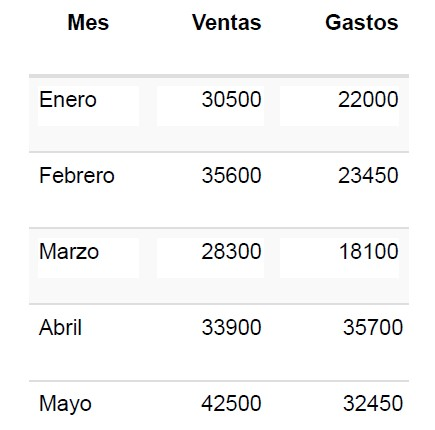

A continuación, generar nuevas columna:
1. Columna 1 = Gasto/Ventas*100.
2. Columna 2 = Si Ventas>= 30000, imprimir “Meta Superada”,
caso contrario imprimir “Meta no Superada”.
3. Columna 3 = Si Gasto>Ventas, calcular el sobre gasto.
4. Obtener el total de las ventas de los últimos 3 meses
5. Obtener el total de gastos de febrero a abril

---


In [45]:
# Importamos las librerias necesarias
import pandas as pd


# Creamos el dataframe con los datos proprocionados

Mes = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo']
Ventas = [30500, 35600, 28300, 33900, 42500]
Gastos = [22000, 23450, 18100, 35700, 32450]

# El nombre de las series
df = pd.DataFrame([Mes, Ventas, Gastos]).T

# Y asignamos nombres a las columnas
columnas = ["Mes", "Ventas", "Gastos"]
df.columns = columnas

df

,Mes,Ventas,Gastos
0,Enero,30500,22000
1,Febrero,35600,23450
2,Marzo,28300,18100
3,Abril,33900,35700
4,Mayo,42500,32450


In [46]:
# Generamos: Columna 1 = Gasto/Ventas*100

df['Columna 1'] = df['Gastos'] / df['Ventas'] *100

df

,Mes,Ventas,Gastos,Columna 1
0,Enero,30500,22000,72.131148
1,Febrero,35600,23450,65.870787
2,Marzo,28300,18100,63.957597
3,Abril,33900,35700,105.309735
4,Mayo,42500,32450,76.352941


In [47]:
''' Generamos:
    Columna 2 = Si Ventas>= 30000, imprimir “Meta Superada”,
    caso contrario imprimir “Meta no Superada”.
'''

df.loc[df['Ventas']>=30000, 'Columna 2'] = "Meta Superada"
df.loc[df['Ventas']<30000, 'Columna 2'] = "Meta No Superada"

# También puede hacerse de esta otra forma:
# df['Columna 2'] = df['Ventas'].apply(lambda x: "Meta Superada" if x >=30000 else "Meta no Superada")

df

,Mes,Ventas,Gastos,Columna 1,Columna 2
0,Enero,30500,22000,72.131148,Meta Superada
1,Febrero,35600,23450,65.870787,Meta Superada
2,Marzo,28300,18100,63.957597,Meta No Superada
3,Abril,33900,35700,105.309735,Meta Superada
4,Mayo,42500,32450,76.352941,Meta Superada


In [48]:
''' Generamos:
    Columna 3 = Si Gasto > Ventas, calcular el sobregasto.
'''
df.loc[df['Gastos'] > df['Ventas'], 'Columna 3'] = df['Gastos'] - df['Ventas']

# procedemos a sustituir los NaN que el método loc ha puesto en la serie 'Columna 3' cuando no se ha cumplido la condición
df['Columna 3'] = df['Columna 3'].fillna(0)

df

,Mes,Ventas,Gastos,Columna 1,Columna 2,Columna 3
0,Enero,30500,22000,72.131148,Meta Superada,0
1,Febrero,35600,23450,65.870787,Meta Superada,0
2,Marzo,28300,18100,63.957597,Meta No Superada,0
3,Abril,33900,35700,105.309735,Meta Superada,1800
4,Mayo,42500,32450,76.352941,Meta Superada,0


In [50]:
''' Generamos:
    Obtener el total de las ventas de los últimos 3 meses
'''

num_meses = len(df['Mes'])

ventas_tres_meses = df[num_meses-3:]['Ventas'].sum()

print("Las ventas de los 3 últimos meses es", ventas_tres_meses)


Las ventas de los 3 últimos meses es 104700


In [51]:
from operator import index
''' Generamos:
    Obtener el total de gastos de febrero a abril
'''

# Los meses de los que debemos obtener los gastos son los meses de Febrero, Marzo y Abril
meses = ['Febrero', 'Marzo', 'Abril']

# Creamos un dataframe con la columa "Gastos" y las filas que cumplan con
# la condición de que el valor dentro de "Mes" coincida con alguno de los de la lista meses
df_gastos = df['Gastos'][df['Mes'].isin(meses)]


print("Los gastos de Febrero a Abril son", df_gastos.sum())

Los gastos de Febrero a Abril son 77250


# **Ejercicio Nº 4**

Con el siguiente fichero: *datos_seguros.csv*
que contiene información de riesgo de clientes de un banco, escribir un programa con los siguientes requisitos:

1. Generar un DataFrame con los datos del fichero.
2. Mostrar por pantalla las dimensiones del DataFrame, el
número de datos que contiene, los nombres de sus columnas
y filas, los tipos de datos de las columnas, mostrar las 10
primeras filas y las 10 últimas filas, verificar si tiene datos
perdidos/nulos.
3. Extraer las 1000 primeras filas y almacenarlas en un
contenedor.

In [52]:
# Importamos las librerías que necesitaremos para el ejercicio

import pandas as pd
import numpy as np
import os
from google.colab import files



In [53]:

# Cargamos en un dataframe los datos existentes en un fichero csv
# El fichero se llama "datos_seguros.csv"

files.upload()

dato_seguros = pd.read_csv('datos_seguros.csv', sep=';', encoding="utf-8")

# Pasamos los datos a un dataframe
riesgo = pd.DataFrame(dato_seguros)


Saving datos_seguros.csv to datos_seguros (1).csv


In [54]:
# Mostramos la información del dataframe
riesgo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45798 entries, 0 to 45797
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MES_T0                   45798 non-null  int64  
 1   VENTA_SEGURO             45798 non-null  int64  
 2   NUM_TC_TOTAL_T2          25397 non-null  float64
 3   SALDO_BCO_T2             25452 non-null  float64
 4   LINEA_BCO_T2             25452 non-null  float64
 5   USO_LINEA_BCO_T2         25452 non-null  float64
 6   Nro_CTa_Ahorro_Bco_T1    44405 non-null  float64
 7   Ahorro_Sldo_Bco_T1       44405 non-null  float64
 8   monto_ope_t2             32927 non-null  float64
 9   PROM_ANUAL_MTO_OPERA     32927 non-null  float64
 10  MAX_MTO_OPERA_Anual      32927 non-null  float64
 11  Ratio_HospvsMtoTotal_t2  29719 non-null  float64
 12  SEXO                     45798 non-null  object 
 13  ANTIGUEDAD_MES           45798 non-null  int64  
 14  DEPARTAMENTO          

In [55]:
# Mostramos las primeras filas
riesgo.head(10)


,MES_T0,VENTA_SEGURO,NUM_TC_TOTAL_T2,SALDO_BCO_T2,LINEA_BCO_T2,USO_LINEA_BCO_T2,Nro_CTa_Ahorro_Bco_T1,Ahorro_Sldo_Bco_T1,monto_ope_t2,PROM_ANUAL_MTO_OPERA,MAX_MTO_OPERA_Anual,Ratio_HospvsMtoTotal_t2,SEXO,ANTIGUEDAD_MES,DEPARTAMENTO,SOW_BCO_T2,SOW_BCO_SEMESTRAL
0,201506,0,3.0,0.0,2300.0,0.000000,0.0,0.0,15.00,18.644444,52.80,NaN,M,58,LIMA,0.000000,0.000000
1,201506,0,2.0,3215.0,3500.0,0.918571,0.0,0.0,548.98,2632.020000,5709.24,NaN,M,69,JUNIN,0.816134,0.930867
2,201506,0,1.0,3169.0,5000.0,0.633800,0.0,0.0,0.00,4999.000000,4999.00,0.0,M,16,CALLAO,1.000000,1.000000
3,201506,1,1.0,6495.0,8450.0,0.768639,2.0,505.0,2137.94,4900.191666,11206.80,NaN,F,62,LIMA,0.413831,0.505504
4,201506,0,NaN,NaN,NaN,NaN,0.0,0.0,12.37,12.370000,12.37,NaN,F,5,AREQUIPA,0.000000,0.000000
5,201506,0,3.0,2373.0,9373.0,0.253174,0.0,0.0,411.86,1410.662727,5055.62,NaN,M,44,CALLAO,0.181633,0.677393
6,201506,0,2.0,0.0,0.0,0.000000,1.0,2662.0,46.00,218.393333,390.90,NaN,M,4,LIMA,0.000000,0.000000
7,201506,0,1.0,3023.0,16720.0,0.180801,0.0,0.0,2982.90,1721.769166,3137.70,0.0,M,136,LIMA,1.000000,1.000000
8,201506,0,1.0,1931.0,12500.0,0.154480,0.0,0.0,412.00,986.337500,2119.00,NaN,M,292,LIMA,0.278603,0.541839
9,201506,0,NaN,NaN,NaN,NaN,2.0,40718.0,1644.30,1581.335000,3565.14,NaN,F,49,AREQUIPA,0.000000,0.000000


In [56]:
# Mostramos las 10 últimas filas
riesgo.tail(10)

,MES_T0,VENTA_SEGURO,NUM_TC_TOTAL_T2,SALDO_BCO_T2,LINEA_BCO_T2,USO_LINEA_BCO_T2,Nro_CTa_Ahorro_Bco_T1,Ahorro_Sldo_Bco_T1,monto_ope_t2,PROM_ANUAL_MTO_OPERA,MAX_MTO_OPERA_Anual,Ratio_HospvsMtoTotal_t2,SEXO,ANTIGUEDAD_MES,DEPARTAMENTO,SOW_BCO_T2,SOW_BCO_SEMESTRAL
45788,201505,0,4.0,0.0,0.0,0.0,0.0,0.0,1054.41,688.975000,1054.41,NaN,F,105,LIMA,0.0,0.0
45789,201505,0,1.0,0.0,0.0,0.0,2.0,8217.0,0.00,681.600000,1337.00,0.0,M,31,ANCASH,0.0,0.0
45790,201505,0,2.0,0.0,0.0,0.0,0.0,0.0,810.00,810.000000,810.00,NaN,M,226,LIMA,0.0,0.0
45791,201506,0,1.0,0.0,0.0,0.0,2.0,9261.0,4244.19,3466.162500,15419.30,0.0,F,204,UCAYALI,0.0,0.0
45792,201505,0,2.0,0.0,12000.0,0.0,2.0,804.0,277.20,237.600000,277.20,NaN,M,8,LA LIBERTAD,0.0,0.0
45793,201505,0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,F,4,LIMA,0.0,0.0
45794,201505,0,NaN,NaN,NaN,NaN,2.0,6189.0,1314.10,1314.100000,1314.10,NaN,F,76,LA LIBERTAD,0.0,0.0
45795,201506,0,NaN,NaN,NaN,NaN,1.0,138.0,36.00,73.114285,220.00,NaN,F,20,LIMA,0.0,0.0
45796,201506,0,NaN,NaN,NaN,NaN,0.0,0.0,0.00,299.468750,830.00,0.0,M,23,PIURA,0.0,0.0
45797,201506,0,1.0,0.0,0.0,0.0,6.0,2762.0,0.00,780.000000,780.00,0.0,M,125,PASCO,0.0,0.0


In [57]:
# Verificamos los datos Nulos / Perdidos

riesgo.isnull().sum()


MES_T0                         0
VENTA_SEGURO                   0
NUM_TC_TOTAL_T2            20401
SALDO_BCO_T2               20346
LINEA_BCO_T2               20346
USO_LINEA_BCO_T2           20346
Nro_CTa_Ahorro_Bco_T1       1393
Ahorro_Sldo_Bco_T1          1393
monto_ope_t2               12871
PROM_ANUAL_MTO_OPERA       12871
MAX_MTO_OPERA_Anual        12871
Ratio_HospvsMtoTotal_t2    16079
SEXO                           0
ANTIGUEDAD_MES                 0
DEPARTAMENTO                   0
SOW_BCO_T2                     0
SOW_BCO_SEMESTRAL              0
dtype: int64

<Axes: >

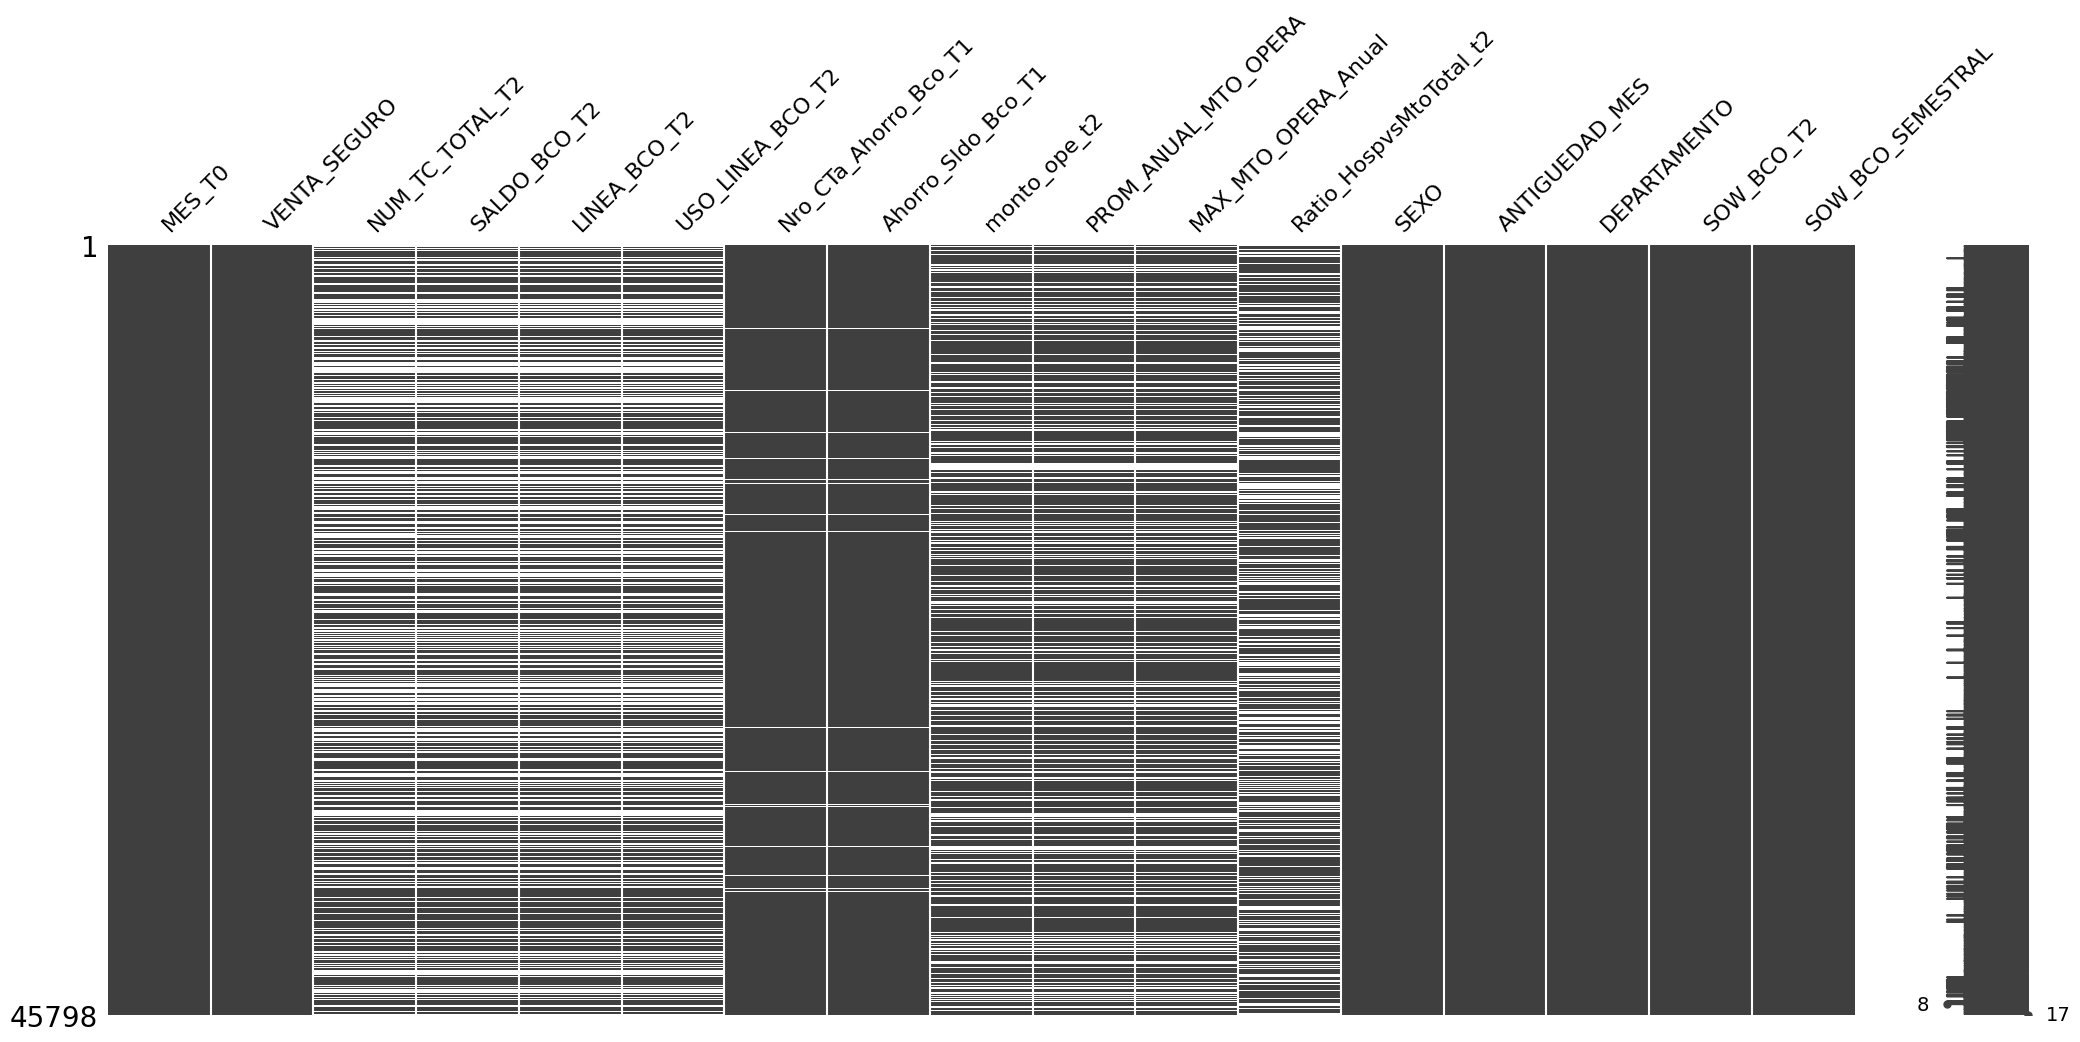

In [58]:
# Y viendo los datos perdidos con missingo
!pip install missingno
import missingno as msno


msno.matrix(riesgo)

In [60]:
# Extraemos ahora las 1000 primeras filas y las metemos en un dataframe
riesgo_1000 = riesgo[:1000]

# Y vemos un resumen de los datos que contiene
riesgo_1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MES_T0                   1000 non-null   int64  
 1   VENTA_SEGURO             1000 non-null   int64  
 2   NUM_TC_TOTAL_T2          621 non-null    float64
 3   SALDO_BCO_T2             622 non-null    float64
 4   LINEA_BCO_T2             622 non-null    float64
 5   USO_LINEA_BCO_T2         622 non-null    float64
 6   Nro_CTa_Ahorro_Bco_T1    995 non-null    float64
 7   Ahorro_Sldo_Bco_T1       995 non-null    float64
 8   monto_ope_t2             765 non-null    float64
 9   PROM_ANUAL_MTO_OPERA     765 non-null    float64
 10  MAX_MTO_OPERA_Anual      765 non-null    float64
 11  Ratio_HospvsMtoTotal_t2  613 non-null    float64
 12  SEXO                     1000 non-null   object 
 13  ANTIGUEDAD_MES           1000 non-null   int64  
 14  DEPARTAMENTO             